In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score


In [37]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Basel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
from imblearn.over_sampling import RandomOverSampler

In [3]:
# Loading Data
data=pd.read_csv(r"C:\Users\Basel\Downloads\Datasets\diabetes\diabetes.csv")

## Explore Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [10]:
(data['BloodPressure'] == 0).sum() + data['BloodPressure'].isnull().sum()

35

In [12]:
data.isnull().sum() ## FOR NAN VALUES
data.describe() ## FOR STATISTICS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.duplicated().sum()

0

How many data is equal to zero but not NAN

In [13]:
#Finding Missing Values in Data
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


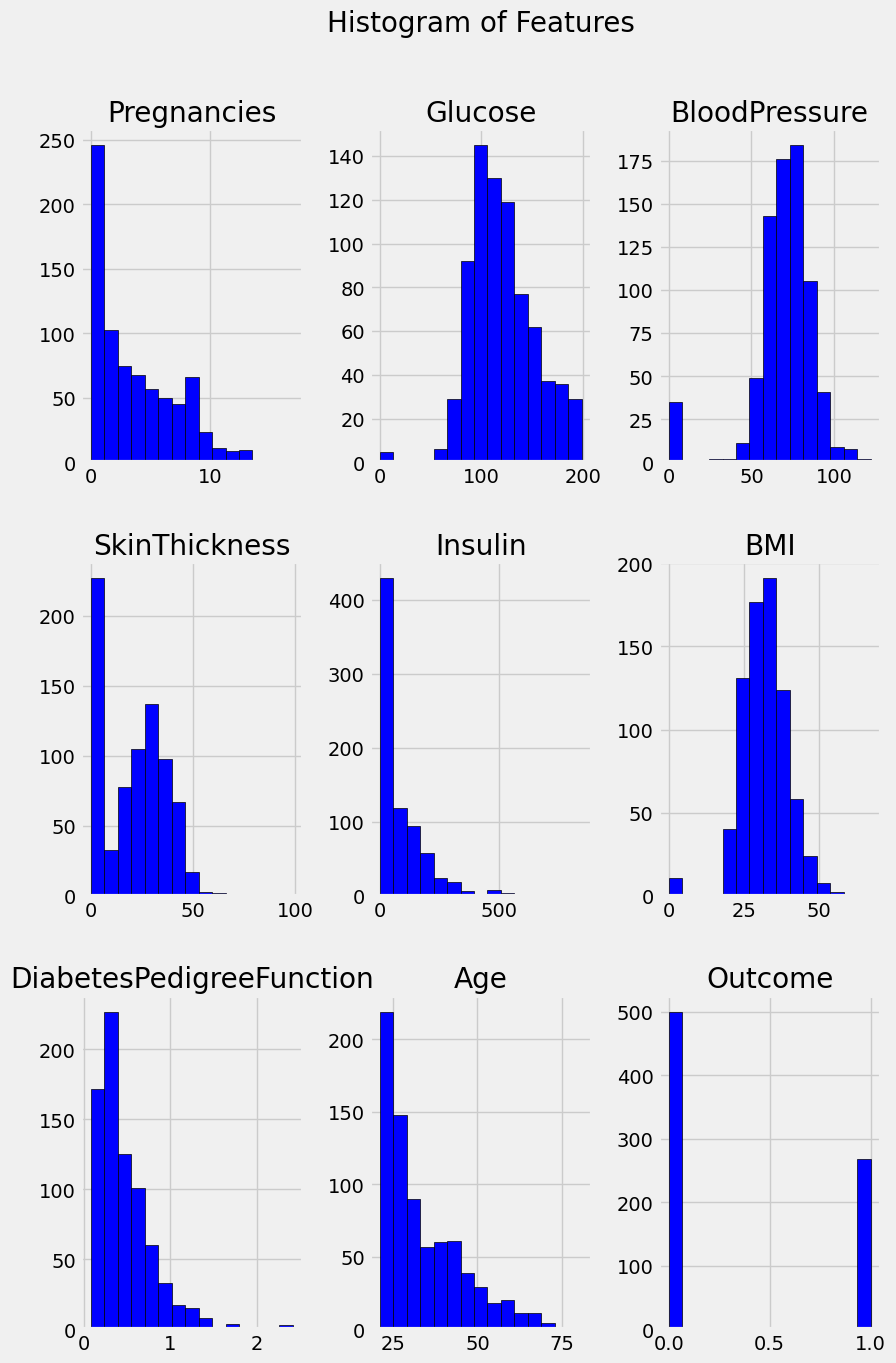

In [16]:
data.hist(bins=15
,figsize=(10,15), color='blue', edgecolor='black')
plt.suptitle('Histogram of Features', fontsize=20)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

Now replace all the zero values with the proper values

In [17]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())#skewed distribution

# Analysis

<Axes: >

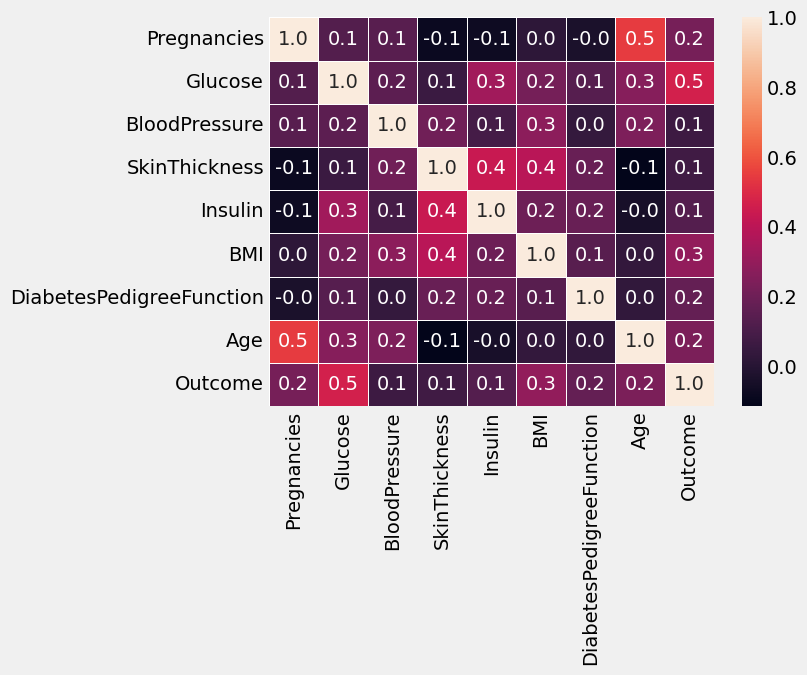

In [14]:
sns.heatmap(data.corr(),annot=True,linewidth=.5,fmt='0.1f')

### Feature Selecting

In [18]:
data=data.drop('Insulin',axis=1)

C:\Users\Basel\AppData\Local\Temp\ipykernel_21336\2990758130.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=data,palette=['g','r'])


<Axes: xlabel='Outcome', ylabel='count'>

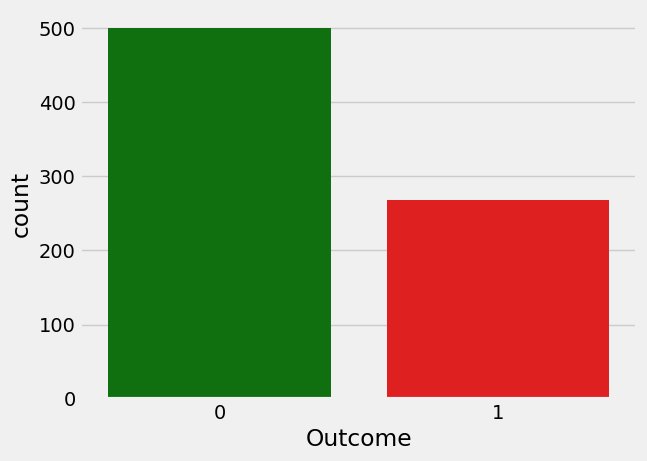

In [19]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

The data isnot balanced

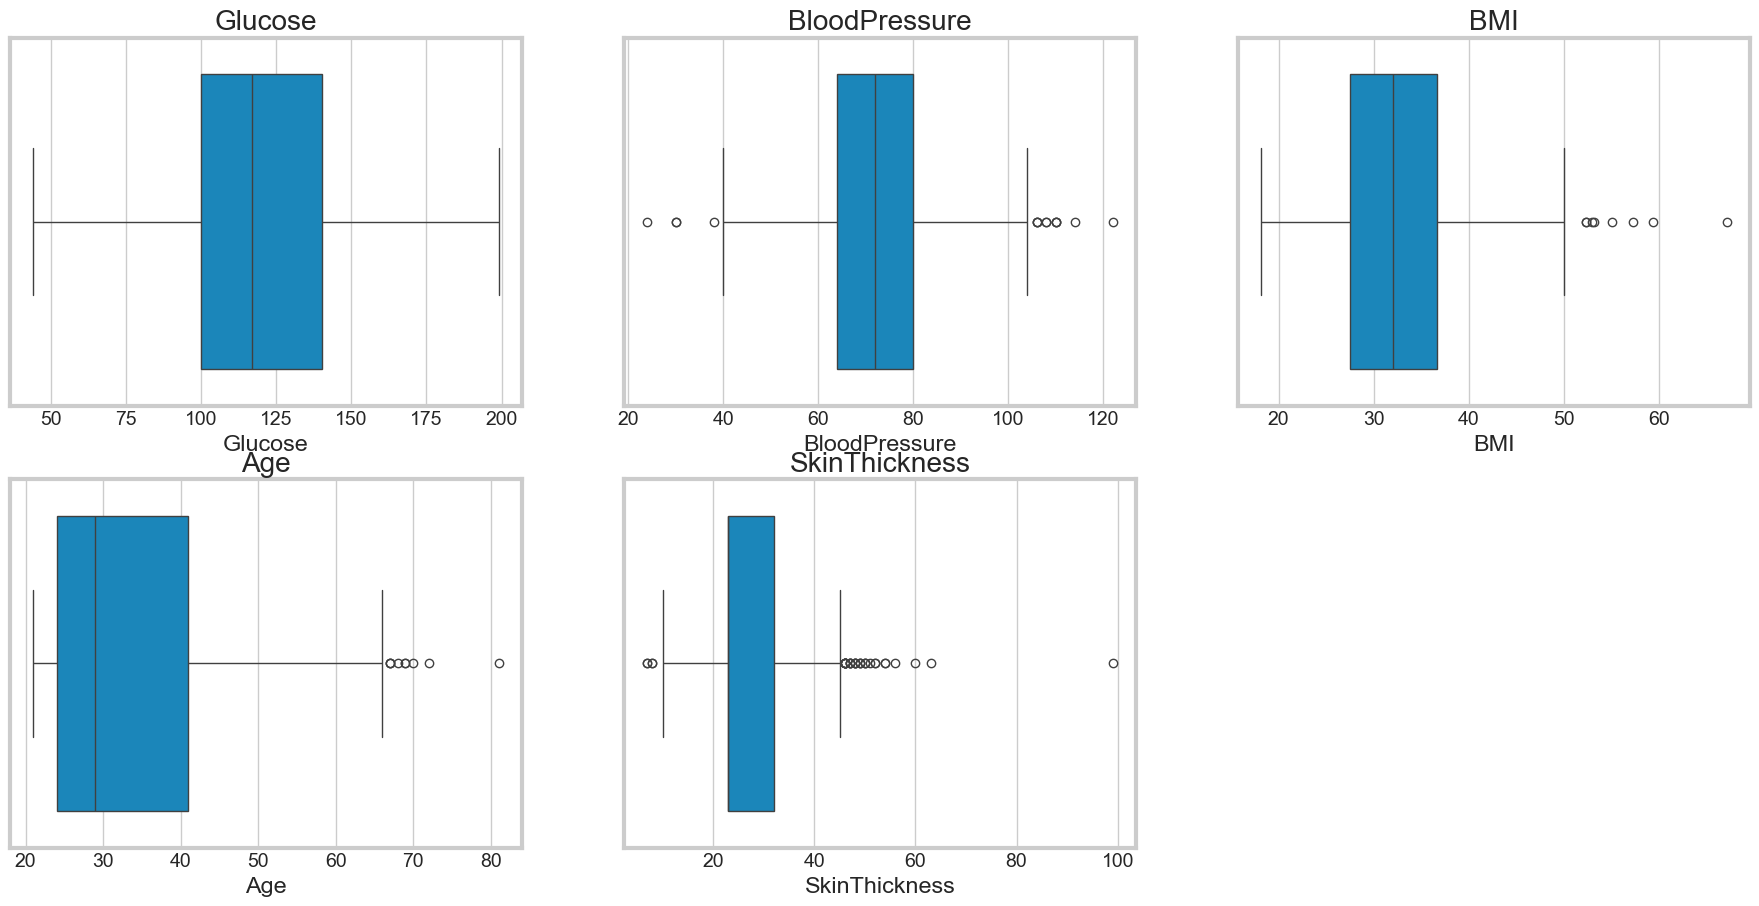

In [23]:
features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'SkinThickness']
plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(feature)
plt.show()


# Create Model using random forest classifier

In [ ]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']   


In [39]:
rm=RandomOverSampler(random_state=41)
x_res,y_res=rm.fit_resample(x,y)

Now see the balancing technique

In [41]:
from collections import Counter
print('Original dataset shape %s' % Counter(y))


Original dataset shape Counter({0: 500, 1: 268})


In [52]:
print('old data {}'.format(Counter(y)))
print('old data {}'.format(Counter(y_res)))

old data Counter({0: 500, 1: 268})
old data Counter({1: 500, 0: 500})


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.2,random_state=41,shuffle=True)

In [46]:
model=RandomForestClassifier(n_estimators=500,random_state=41)

# when trying n_estimators = 100 the accuracy isnot desired so up to 500 

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        94
           1       0.86      0.92      0.89       106

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



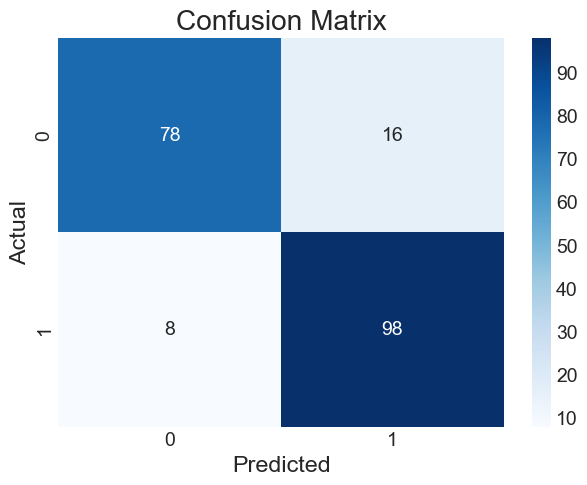

[0.88, 0.9245283018867925, 0.8596491228070176, 0.8909090909090909]
Accuracy: 0.8800 | Recall: 0.9245 | Precision: 0.8596 | F1 Score: 0.8909


In [47]:

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
result=[]
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result.append(accuracy)
result.append(recall)
result.append(precision)
result.append(f1)
#classification report
print(classification_report(y_test, y_pred))
# Show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print results
print(result)
print(f'Accuracy: {accuracy:.4f} | Recall: {recall:.4f} | Precision: {precision:.4f} | F1 Score: {f1:.4f}')


In [40]:
# Hidden Step To Get Best Parameters To My Model

In [33]:
"""param_grid = {
    'n_estimators': [100, 500, 1000,1500], 
    'max_depth': [None, 5,7, 10], 
    'min_samples_split': [2, 5,7, 10], 
    'min_samples_leaf': [1, 2,3, 4]
}"""

"param_grid = {\n    'n_estimators': [100, 500, 1000,1500], \n    'max_depth': [None, 5,7, 10], \n    'min_samples_split': [2, 5,7, 10], \n    'min_samples_leaf': [1, 2,3, 4]\n}"

In [34]:
"""model=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(x_res,y_res)
print(grid_search.best_params_)"""

'model=RandomForestClassifier()\nfrom sklearn.model_selection import GridSearchCV\ngrid_search = GridSearchCV(model, param_grid=param_grid, cv=5)\ngrid_search.fit(x_res,y_res)\nprint(grid_search.best_params_)'

# Using My Model To Predict New Data

In [51]:
model.predict(x_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0], dtype=int64)

In [54]:
import pickle

In [ ]:
file_name = 'diabetes_model.sav'
pickle.dump(model, open(file_name, 'wb')) ## wb is for write binary
loaded_model = pickle.load(open(file_name, 'rb')) ## rb is for read binary
loaded_model.predict(x_test)
